# COGS 108 - Assignment 2: `pandas` & Data Visualization

This assignment covers the basics of data wrangling, working with data in `pandas`, and making and interpreting basic visualizations. 

This assignment is out of 8 points, worth 8% of your grade.

**PLEASE DO NOT CHANGE THE NAME OF THIS FILE.**

**PLEASE DO NOT COPY & PASTE OR DELETE CELLS INLCUDED IN THE ASSIGNMENT.** 

# Part 1: Setup

Throughout this assignment we'll review and get practice with the basics of using the `pandas` package for working with tabular data.

You will absolutely use `pandas` throughout this course, and, if you continue to use Python for working with data in the future, will continue to use this package. This means that while you could Google and look up every `pandas` function/method when doing assignments, it's best to memorize the basics. So, do your best to understand each operation you carry out here, as you'll almost certainly see it again. And, try to commit the most commonly-used functions/methods (those being presented here) to memory. It will save future you a ton of time. The more comfortable you are with `pandas`, the easier the rest of the assignments and your final project will be for you!

Finally, there are a ton of great `pandas` resources and documentation out there, including [10 minutes to `pandas`](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html). Feel free to use them! However, many of the examples in this assignment were inspired by `pandas` tips and tricks: https://www.dataschool.io/python-pandas-tips-and-tricks/. Feel free to check out all the additional tips and tricks there, many of which are *not* covered here.

## Q1: `import` (0.25 points)

1. Import the `pandas` package using its typical shortname, `pd`. 
2. Import the `numpy` package using its typical shortname, `np`.
3. Import the `seaborn` package using its typical shortname, `sns`.
4. Import the `matplotlib.pyplot` package using its typical shortname, `plt`.

In [2]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/home/akaji/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/akaji/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/tmp/ipykernel_712/3166120395.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/opt/conda/lib/python3.9/site-packages/scipy/__i

In [3]:
assert pd
assert np
assert sns
assert plt

# Part 2: Data Import, DataFrames, & Series

The `pandas` package has a number of helpful import functions (`read_csv()`, `read_json()`, `read_html()`, etc.)

We'll use a number of these throughout the course; however, for this assignment we'll use a CSV file from [FiveThirtyEight](https://fivethirtyeight.com). The summarized data in the file we'll use here were used in the article [*The Ultimate Halloween Candy Power Ranking*](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/). To collect these data, candies were pitted against one another with participants having to choose which they liked better.

The most important functional unit of the `pandas` package is the **DataFrame**. DataFrames store information in rows and columns. 

Secondarily, **Series** are one-dimensional labeled arrays. They can hold data of any type.

You can think of a DataFrame as a bunch of related Series stored together, such that the information in each row comes from a single observation, and each column (Series) stores information about a single variable measured across the observations.

To access a column (Series) from a Dataframe, the following syntax is used:

```python
df['series']
```

Here `df` is the object storing the `pandas` dataframe and 'series' is the column name in `df` that you want to access.

More information about DataFrames and Series is available [here](https://pandas.pydata.org/docs/getting_started/overview.html).

## Q2: Read the data into Python (0.25 points)

To use the data, you'll have to read it in as a Dataframe. Use the appropriate pandas import function to read in the file from the following repo: https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking.

Note that URLs can be read in directly using `pandas`. The URL you'll want to use to read the file in is: https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv. 

Store this in the variable `df`.

In [4]:
# YOUR CODE HERE
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv")

In [5]:
assert isinstance(df, pd.DataFrame)
assert df.shape == (85, 13)

## Q3: Data Summary (1 point)

After reading in a dataset, it's often helpful to get a quick sense of what information is stored in the dataset. Here you'll carry out a number of operations that you'll carry out on almost every dataset you read into Python.

### Q3a: `shape`
One way to do that is to determine the `shape` of the dataset. This reports the number of rows and columns in the dataset. Store the shape of the candy dataset in the variable `candy_shape`.

In [6]:
candy_shape = df.shape 
print(candy_shape)

(85, 13)


In [7]:
assert candy_shape == (85, 13)

Note that `pandas` DataFrames also print out well when you access them. This allows you to get a sense of the information stored in your dataset overall.

For example, if you run the cell below, you'll see what information is stored in this dataset.

In [8]:
# take a look at the information stored in df
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


A full description of these data can be found [here](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking). From that link, we'll include a description of each variable (column) here:

Header | Description
-------|------------
chocolate | Does it contain chocolate?
fruity | Is it fruit flavored?
caramel | Is there caramel in the candy?
peanutalmondy | Does it contain peanuts, peanut butter or almonds?
nougat | Does it contain nougat?
crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
hard | Is it a hard candy?
bar | Is it a candy bar?
pluribus | Is it one of many candies in a bag or box?
sugarpercent | The percentile of sugar it falls under within the data set.
pricepercent | The unit price percentile compared to the rest of the set.
winpercent | The overall win percentage according to 269,000 matchups.

Note that many of the variables store binary information, where 0 means False and 1 means True. For example, for a Snickers bar, `chocolate` would have the value 1 (becuase it *is* chocolate), while `fruity` for the same candy would store 0 (because Snickers bars are *not* fruity).

### Q3b: `describe`

`pandas` also has a very helfpul `describe` method which will provide some helpful summary statistics about your dataframe.

Use the `describe` method to calculate and display these summary statistics (You do *not* have to store the output):

In [9]:
# YOUR CODE HERE
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


### Q3c: histogram

Generate a histogram of the `winpercent` column with 15 bins.

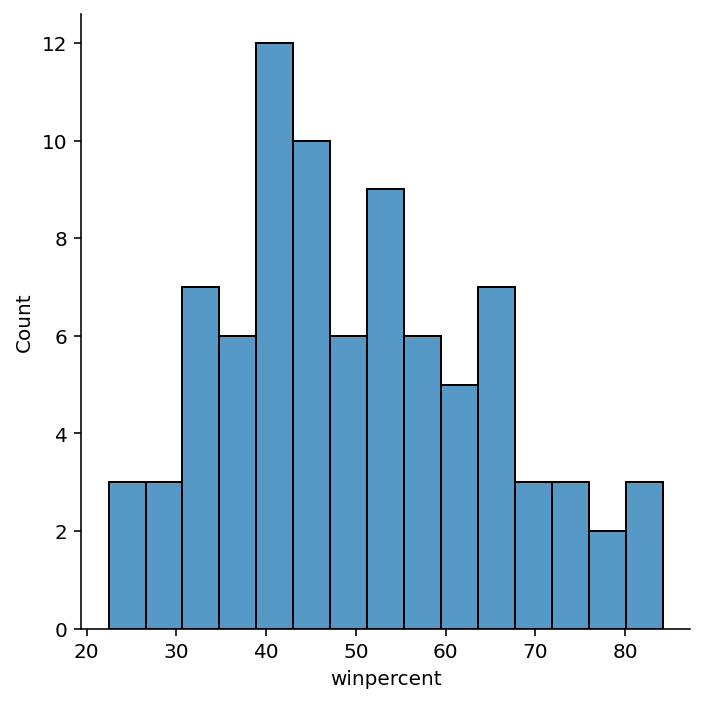

In [10]:
# YOUR CODE HERE
sns.displot(df['winpercent'], bins=15)

f1 = plt.gcf()

In [11]:
assert f1.gca().has_data()

# If you fail this test, you didn't use 15 bins for your histogram.
assert len(f1.gca().patches) == 15

Using the output you just generated in Q3b and Q3c, answer the following questions, storing the answer in the variable at the front of each question. (For example, if you thought the answer to the first question was A, you would include `win_perc = 'A'` in the cell below.)

`win_perc` : What is the highest overall win percentage among the candy included in this dataset? 

- A) 1.00
- B) 98.8
- C) 85.00
- D) 84.18
- E) Unable to determine

`fruity` : What proportion of the dataset is comprised of fruity candy?
- A) 0
- B) 0.45
- C) 0.50
- D) 85
- E) Unable to determine

In [12]:
# YOUR CODE HERE
win_perc = "D"
fruity = "B"
answers = [win_perc, fruity]

In [13]:
answers = ['A', 'B', 'C', 'D']
assert win_perc
assert fruity

In [14]:
assert win_perc in answers


In [15]:
assert fruity in answers


It's typically most helpful to access a Series of a DataFrame to then use a `pandas` method to understand more about the values in that Series. 

For example, we could see the values stored in the `chocolate` column using:

```python
df['chocolate']
```

However, we typically build upon this by determining some other information about the values in that Series. For example, we often want to determine how many different observations there are for each possible values in a Series with discrete information. The `value_counts()` method can be helpful in determining this.

### Q3d: `value_counts()`

Using the `value_counts()` method, determine how many different possible values there are for the `chocolate` series in the `df` DataFrame and how many observations fall into each. 

Store the output in the object `chocolate_values`.

Take a look at the output. Be sure you understand whether or not there are more chocolate (`chocolate == 1`) or nonchocolate candies (`chocolate == 0`) in the dataset from the output.

In [16]:
# YOUR CODE HERE
chocolate_values = df['chocolate'].value_counts()

chocolate_values

chocolate
0    48
1    37
Name: count, dtype: int64

In [17]:
assert chocolate_values.loc[0] == 48

### Missing Data

There are a number of different ways in which to determine whether or not data are missing. The most common approaches are summarized here:

```python
# Calculate % of missing values in each column:
df.isna().mean()

# Drop columns with any missing values:
df.dropna(axis='columns')

# Drop columns in which more than 10% of values are missing:
df.dropna(thresh=len(df)*0.9, axis='columns')

# Want to know the *count* of missing values in a DataFrame?
df.isna().sum().sum()

# Just want to know if there are *any* missing values?
df.isna().any().any()
df.isna().any(axis=None)
```

Run the following cell and interpret the output:

In [18]:
# determine which columns have missing data
df.isna().any()

competitorname      False
chocolate           False
fruity              False
caramel             False
peanutyalmondy      False
nougat              False
crispedricewafer    False
hard                False
bar                 False
pluribus            False
sugarpercent        False
pricepercent        False
winpercent          False
dtype: bool

### Q3e: `isna()`

How many variables have missing data in this dataset? Store the value in the variable `var_missing`: 

In [19]:
# YOUR CODE HERE
var_missing = df.isna().sum().sum()

In [20]:
assert isinstance(var_missing, (np.int64, int))


## Q4: `replace` (0.5 points)

To replace current values with different values dynamically, `replace` is very helpful.

To demonstrate this, if you wanted to replace the zeroes and ones in the current dataset with boolean values, true or false, you could do this using `replace`.

In `df`, replace `0` with `False` and `1` with `True`. 

Store this output in `df_bool`.

In [21]:
# YOUR CODE HERE
df_bool = df.replace({0:False, 1:True})
df_bool

/tmp/ipykernel_712/943126108.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bool = df.replace({0:False, 1:True})


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,True,False,True,False,False,True,False,True,False,0.732,0.860,66.971725
1,3 Musketeers,True,False,False,False,True,False,False,True,False,0.604,0.511,67.602936
2,One dime,False,False,False,False,False,False,False,False,False,0.011,0.116,32.261086
3,One quarter,False,False,False,False,False,False,False,False,False,0.011,0.511,46.116505
4,Air Heads,False,True,False,False,False,False,False,False,False,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,False,True,False,False,False,False,False,False,False,0.220,0.116,45.466282
81,Warheads,False,True,False,False,False,False,True,False,False,0.093,0.116,39.011898
82,Welch's Fruit Snacks,False,True,False,False,False,False,False,False,True,0.313,0.313,44.375519
83,Werther's Original Caramel,False,False,True,False,False,False,True,False,False,0.186,0.267,41.904308


In [22]:
assert df_bool.shape == df.shape
assert df_bool.loc[1,'chocolate'] == True
assert df_bool.iloc[0,0] == '100 Grand'
assert type(df_bool.loc[1,'chocolate']) != np.int64

## Q5: barplot (0.4 points)

#### Q5a: generate barplot

Generate a barplot displaying the number of True and False values for the `chocolate` series.

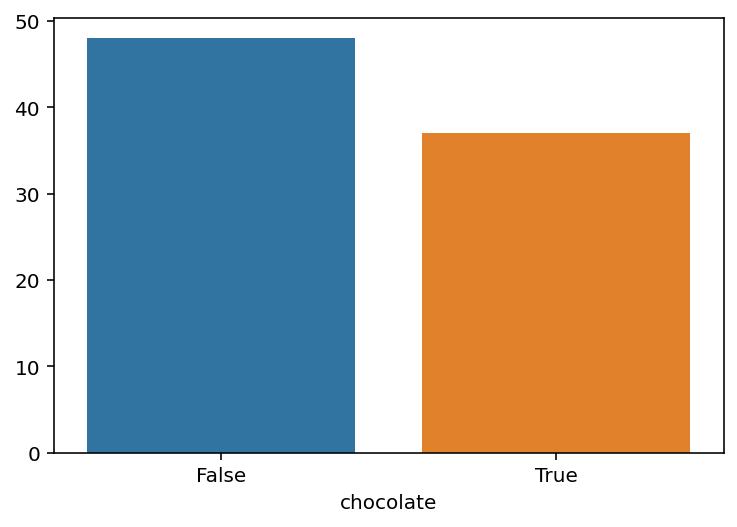

In [23]:
# YOUR CODE HERE
choc_counts = df_bool['chocolate'].value_counts()
sns.barplot(x=choc_counts.index, y=choc_counts.values)

f2 = plt.gcf()

In [24]:
assert f2.gca().has_data()

### Q5b: Interpretation

Using the output you just generated in Q5a, answer the following question, storing the answer in the variable `bar_interp`. (For example, if you thought the answer was A, you would include `bar_interp = 'A'` in the cell below.)

Which of the following is true about the plot you just generated?

- A) 48% of the observations in the dataset were non-chocolate candies
- B) 48% of the observations in the dataset were chocolate candies
- C) There were approximately 10 more chocolate candies than non-chocolate candies in the dataset
- D) There were approximately 10 more non-chocolate candies than chocolate candies in the dataset

In [25]:
# YOUR CODE HERE
bar_interp = "A"

In [26]:
answers = ['A', 'B', 'C', 'D']
assert bar_interp in answers


# Part 3: Common Manipulations

Regardless of the dataset you're working with, you'll want to be *very* familiar with a few common data manipulations when wrangling data, each of which is described below:

Manipulation | Description
-------|------------
**select** | select which columns to include in dataset
**filter** | filter dataset to only include specified rows
**mutate** | add a new column based on values in other columns
**groupby** | group values to apply a function within the specified groups
**summarize** | calculate specified summary metric of a specified variable
**arrange** | sort rows ascending or descending order of a specified column
**merge** | join separate datasets into a single dataset based on a common column

We'll review how to carry out each of these in `pandas` and you'll get practice with each.

## Q6: Column Operations (2.25 points)

Often we're only interested in working with some columns in a larger dataset and it's helpful to filter the dataset so that it only includes the columns we want. In these cases, we *select* the columns we're interested in by specifying these columns and returning the output.

In pandas, there are a number of ways in which this can be done, but the most common is to specify a list of columns you want by name and in the order you want.

For example, for a dataframe (`df`) with five columns ('A', 'B', 'C', 'D', 'E'), you could select columns 'C', 'B' and 'A' (in that order), using the following:

```python
df[['C', 'B', 'A']]
```

### Q6a: selecting columns

For our candy dataset, we're ultimately interested in determining the differences between chocolate and fruity candy.

To just get the data we're interested in, return a DataFrame with the columns (in this order): `competitorname`, `chocolate`, `fruity`, `hard`, `bar`, `pluribus`, `sugarpercent`, `pricepercent`, and `winpercent`.

Store this output  in `df` (overwriting the previous data stored in `df`).

In [27]:
df = df.loc[:,['competitorname', 'chocolate', 'fruity', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']]

In [28]:
df

,competitorname,chocolate,fruity,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0.186,0.267,41.904308


In [29]:
assert df.shape == (85, 9)

### `dtypes`

Occassionally, there are a number of different types of data (strings, numbers, etc.) in a DataFrame and you're only interested in data of a particular type. For example, in `df_bool`, we have the data about the candy stored as Booleans (False, True) rather than integers (0,1). 

To remind yourself of what type of information is stored in each column, the `dtypes` attribute can be very helpful:

In [30]:
# see types for each variable in df
df.dtypes

competitorname     object
chocolate           int64
fruity              int64
hard                int64
bar                 int64
pluribus            int64
sugarpercent      float64
pricepercent      float64
winpercent        float64
dtype: object

In [31]:
# see types for each variable in df_bool
df_bool.dtypes

competitorname       object
chocolate              bool
fruity                 bool
caramel                bool
peanutyalmondy         bool
nougat                 bool
crispedricewafer       bool
hard                   bool
bar                    bool
pluribus               bool
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

### Q6b: Select by Data Type

For the `df_bool` dataset, we're interested in selecting only the columns that are either a string (object) or a bool. 

Use the `pandas` `select_dtypes` method to select those columns. Note, you'll have to specify the `include` parameter. 

Store this output in `df_bool`

In [32]:
# YOUR CODE HERE
df_bool = df_bool.select_dtypes(include=[bool, object])
df_bool.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,100 Grand,True,False,True,False,False,True,False,True,False
1,3 Musketeers,True,False,False,False,True,False,False,True,False
2,One dime,False,False,False,False,False,False,False,False,False
3,One quarter,False,False,False,False,False,False,False,False,False
4,Air Heads,False,True,False,False,False,False,False,False,False


In [33]:
assert df_bool.shape == (85, 10)

### Q6c: Renaming Columns 
Often, data have less than helpful column names. To make working with these data as simple as possible, it can be helpful to ensure that all columns have helpful column names. `rename` can help you do this

Generally there are three approaches to renaming columns:
1. Most flexible option: `df = df.rename({'A':'a', 'B':'b'}, axis='columns')`
2. Overwrite all column names: `df.columns = ['a', 'b']`
3. Apply string method: `df.columns = df.columns.str.lower()`

For our dataset in partciular, `pluribus` is not an ideal column name. Use approach 1 above to `rename` `pluribus` to `multicandy_pack` for both the `df` and `df_bool` dataframes.

In [34]:
# YOUR CODE HERE
renamer = lambda dataframe: dataframe.rename({'pluribus':'multicandy_pack'}, axis='columns', inplace=True)
renamer(df)
renamer(df_bool)

In [35]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'hard', 'bar',
       'multicandy_pack', 'sugarpercent', 'pricepercent', 'winpercent'],
      dtype='object')

In [36]:
assert 'multicandy_pack' in df.columns
assert 'multicandy_pack' in df_bool.columns

### Q6d: Adding new columns

Often when working with data we need to add additional columns that use information from existing columns.

To do this, we typically use one of two approaches, summarized generally here: 
1. `assign`
```python
df.assign(new_col = df['col'] * val)
```
2. `apply`
```python
for col in df.columns:
      df[f'{col}_new'] = df[col].apply(my_function)
```

For example, are there any candy in our dataset that are *neither* fruity *nor* chocolate? 

Use `assign` to add a new column to `df` called `fruity_choco` that adds the value in `chocolate` to the value in `fruity`. This way, the value will be `0` if it is neither fruity nor chocolate, `1` if it is one or the other, and `2` if it is both.

Store the output in `df`.

In [37]:
# YOUR CODE HERE
df = df.assign(fruity_choco = df['fruity']+df['chocolate'])

In [38]:
assert isinstance(df['fruity_choco'], pd.Series)


Let's take a look at this new variable we created. We can use `value_counts()` to determine how many candies fall into each category:

In [39]:
# see breakdown of 'fruity_choco' column
df['fruity_choco'].value_counts()

fruity_choco
1    73
0    11
2     1
Name: count, dtype: int64

### Q6e: neither

Take a look at the output above. How many candies are neither fruity nor chocolate? Store this value in the variable `neither`.

In [40]:
# YOUR CODE HERE
neither = df['fruity_choco'].value_counts()[2]

In [41]:
assert neither >= 0 and neither <= len(df)


## Q7: Row Operations (0.9 points)

In addition to column operations, filtering rows to only include those of interest to your analysis can be very important. For example, if we wanted to only include candy that was either chocolate or fruity, we would want to filter to only include the candies that fit that criterion. 

To do this, we have to *filter* the data, using **slicing**.

### slicing:  `loc` and `iloc`

Subsets of data from a DataFrame can also be extracted through the use of slicing. There are two general approaches to slicing:

Manipulation | Description
-------|------------
`loc` | label-based indexing 
`iloc` | integer-based indexing

For example, you could use `loc`: 

```python
df.loc[:, ['A', 'B', 'C']]
```

This would return all rows (indicated by the `:`) and three columns  `['A', 'B', 'C']`.

Alternatively, integer-based indexing could be used with `iloc` (where the `i` stands for index):

```python
df.iloc[0:5, 0:5]
```

This would return the first five rows and columns of the dataframe `df`. (As a reminder: when indicating ranges in Python, the final value is not included in what is returned. So, this returns the zero-th through the 4th indices. Index 5 is not included in the output)

Python also uses *zero-based indexing* which means the first element is indexed as zero, the second has index 1, and so on.

### Q7a: Slicing

The concept of slicing can be combined with conditionals. For example, you can return all rows of a particular value. 

Using `value_counts()` above on the `fruity_choco` column we created, we see that there is one candy that is both chocolate and fruity in our dataset. Let's figure out which candy that was!

Use slicing to return the row from `df` where `fruity_choco` indicated the candy was both fruity and chocolate. 

Store this DataFrame (which will have a single row) as `both`.  (Note you'll likely want to look at the output in `both` to figure out how to best do this.

Again using indexing, store the name of the candy that is both fruity and chocolate in the variable `candy_name`.

In [42]:
# YOUR CODE HERE
both = pd.DataFrame(df.loc[df['fruity_choco']==2, :])
candy_name = both.loc[:,'competitorname'].values[0]

In [43]:
assert type(both) == pd.DataFrame
assert both.shape == (1, 10)


In [44]:
assert isinstance(candy_name, str)


## Filtering rows

DataFrames can be subset in a number of different ways. For example, to filter a DataFrame to only include certain rows, you could use the approaches summarized here:

If you wanted to filter a DataFrame by a condition, you could use the following approach:

```python
df[df.color == 'red']
```

Note that this extends and works with multiple OR conditions:

```python
df[(df.color == 'red') | (df.color == 'green') | (df.color == 'blue')]
```

A shorter approach to this would utilize `isin`:
```ptyhon
df[df.color.isin(['red', 'green', 'blue'])]
```


### Q7b: Filtering

Using this concept, filter `df` to only include rows that contain candy that is fruity or chocolate in some capacity (meaning, something that is both fruity and chocolate *would* be included). 

Store this output in `df`.

In [45]:
# YOUR CODE HERE
df = df[df.fruity_choco!=0]

In [46]:
assert df.shape == (74, 10)
assert not any(df['fruity_choco'] == 0)

### aside: calculations on subsets of the data

Calculations can be carried out on columns using conditionals. For example, if you wanted to determine how many of the candies in our current dataset are part of a pack of candy with multiple types of candy in the pack, you could use `sum()` on the subset of the data that meets that condition

In [47]:
# carry out calculation
(df['multicandy_pack']==1).sum()

38

## Q8: arrange rows (1.2 points)

While you don't always care about what order the rows are sorted, at times it can be helpful to sort a DataFrame so that the rows are ordered in a particular manner.

To do this, `sort_values` can be very helpful. For example, to sort by the values in 'col', you would use the following:

```python
df.sort_values(by=['col'])
```

To arrange (sort) the rows by more than one column, the syntax changes slightly:

```python
df.sort_values(by=['col1', 'col2'])
```

### Q8a: `sort_values`

Specifically, `df` is currently sorted in alphabetical order by competitor name (candy). What if we were most curious about the sugar percentile of where the candy falls within the dataset? 

**Arrange the rows** in `df` such that the candy with the highest `sugarpercent` is displayed first and the lowest `sugarpercent` last. Store this in `df.`

Also, note that when using `sort_values`, the original indices are retained. So, also **reset the index** of `df` so that the highest `sugarpercent` candy is index 0.

In [48]:
# YOUR CODE HERE
df = df.sort_values(by='sugarpercent', ascending=False).reset_index()

In [49]:
assert df.loc[0,'competitorname'] != '100 Grand'
assert np.allclose(df.loc[0,'sugarpercent'], 0.988)

In [50]:
# checking correct value

In [51]:
# take a look at the first few rows
df.head()

,index,competitorname,chocolate,fruity,hard,bar,multicandy_pack,sugarpercent,pricepercent,winpercent,fruity_choco
0,54,Reese's stuffed with pieces,1,0,0,0,0,0.988,0.651,72.887901,1
1,38,Milky Way Simply Caramel,1,0,0,1,0,0.965,0.860,64.353340,1
2,61,Skittles wildberry,0,1,0,0,1,0.941,0.220,55.103695,1
3,60,Skittles original,0,1,0,0,1,0.941,0.220,63.085140,1
4,4,Air Heads,0,1,0,0,0,0.906,0.511,52.341465,1


### Q8b: Sugar Rush

Which candy in our dataset is the sugariest? Record your answer in the variable `sugary`. For example, if you thought the answer was A, you would submit `sugary = 'A'`.

- A) Chiclets
- B) 100 Grand
- C) Reese's Miniatures
- D) Reese's stuffed with pieces (aka Reese's Pieces)



In [52]:
# YOUR CODE HERE
sugary = 'D'

In [53]:
assert isinstance(sugary, str)


## Q9: `groupby` (1.25 points)

Once a dataset is in order, including the columns and rows that you need for your analysis, it's often helpful to carry out some grouped operations. `groupby` allows you to group the data in your dataset by the values in a specific column. Calculating descriptive statistics (mean, median, min, max, etc.) can then be easily calculated within groups.

For example, if you wanted to `groupby` a candy's `chocolate` status and then carry out some calculations within the group, say, determine the average value for the pricepercent, grouped by `chocolate` status, you could use the code below to do so:

In [54]:
# carry out operation
df.groupby("chocolate")["pricepercent"].mean()

chocolate
0    0.332946
1    0.632162
Name: pricepercent, dtype: float64

### Q9a: Cost Interpretation

Looking at the output in the previous cell, which type of candy costs more, non-chocolate or chocolate candy? Store your response in `candy_cost`. For example, if you thought the answer was A, you would submit `candy_cost = 'A'`.

- A) candy containing chocolate costs more
- B) candy without chocolate costs more
- C) candy without and containing chocolate cost the same

In [55]:
# YOUR CODE HERE
candy_cost = 'A'

In [56]:
assert isinstance(candy_cost, str)


### Q9b: specific column aggregation

Carrying out a similar operation, group `df` by `fruity`, and then calculate the minimum, average (mean), and maximum values, **for the `sugarpercent` column only**. 

For this, fruity should be the name for the indices and your column names should be 'min', 'mean', and 'max'.

Store this result in `sugar_summary`.

#### Note: the `pandas` documentation [here](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) may help you if you're struggling to figure out the syntax

In [57]:
# YOUR CODE HERE
sugar_summary = df.groupby('fruity')['sugarpercent'].agg(['min', 'mean', 'max'])

# look at output
sugar_summary

,min,mean,max
fruity,,,
0,0.034,0.509444,0.988
1,0.046,0.467895,0.941


In [58]:
assert type(sugar_summary) == pd.DataFrame
assert sugar_summary.index.name == 'fruity'
assert 'min' in [j for i in sugar_summary.columns for j in i] and len(sugar_summary.columns) == 3 or 'min' in sugar_summary.columns

### Q9c: Sugar Interpretation

Looking at the output in Q9b and considering what you know about the dataset thus far, which type of candy has the higher average sugar percentile, fruity candy or chocolate candy? Store your response in `candy_sugar`. For example, if you thought the answer was A, you would submit `candy_sugar = 'A'`.

- A) non-fruity candy has the higher average sugar percentile
- B) fruty candy has higher average sugar percentile
- C) chocolate and fruity have the same average sugar percentile

In [1]:
# YOUR CODE HERE
candy_sugar = 'A'

In [2]:
assert isinstance(candy_sugar, str)


## The End!

Good work! While this just scratches the surface of what you can use `pandas` to do, we covered common manipulations you'll do *a lot*. Do your best to understand each operation you carried out here, becoming as familiar with `pandas`, common operations, and the syntax, as possible. These will be used throughout this quarter and (most likely) whenever you're working with tabular data in Python.

Have a look back over your answers, and also make sure to `Restart & Run All` from the kernel menu to double check that everything is working properly. You can also use the 'Validate' button above, which runs your notebook from top to bottom and checks to ensure all `assert` statements pass. When you are ready, submit on datahub!